# Imaging Genomics of Glioblastoma I

<p  style="text-align:justify"> In this project, we analyze paired genomic and imaging data from the Glioblastoma cohort in The Cancer Genome Atlas (TCGA) and The Cancer Imaging Atlas (TCIA) to explore possible associations between imaging and genomic features. 
    
This is situated in the field of radiogenomics which aims at studying possible associations between imaging and genomics with the goal of predicting genomic features using imaging studies. This is extremely desirable given that imaging studies are painless and easily obtained, whereas obtaining genomic features is risky, expensive, and not always possible.<br><br>

This notebook is a replication of the analyses in: <br>
 David A. Gutman, William D. Dunn, Patrick Grossmann, Lee A.D. Cooper, Chad A. Holder, Keith L. Ligon, Brian M. Alexander, and Hugo J.W.L. Aerts. <strong>Somatic mutations associated with MRI-derived volumetric features in glioblastoma. </strong> Neuroradiology, 7(12):1227–1237, 2015. 
<br>
<br>
Imaging features were obtained from [3]. Mutation data was downloaded from TCGA [4].
    </p>
<br>





<div style = "width:450px; ">
<a href="url"><img src="img/img_glioblastoma_1/gutman_illustration.jpg" align="left" width="450px"   ></a>
<b style: float:left>Figure 1.</b>Methodology followed in the replication of [2] 
</div>
<p  style="text-align:justify"> We have 102 subjects with imaging features, and 57 subjects with imaging and mutation data. <br>
   <br>
    The analyses (Figure 1) consisted on: <br>
    1. Testing imaging features for normality <br>
    2. Computing the Pearson correlation matrix of the imaging features <br>
    3. Applying t-tests for each of the 11 imaging features and each of the genes considered in the study: TP53, PTEN, NF1, EGFR, IDH1, PIK3R1, RB1, PIK3CA, and PDGFRA; which are relevant genes in glioblastoma.
        </p>


## Data Exploration

We start by loading the necessary libraries and reading the data. 

In [1]:
options(warn=-1)
#Load libraries
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(MASS))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(gplots))

#Reads imaging features
im <- read.table("data/data_glioblastoma_1/matrix_radiomics.txt", header = TRUE, sep="\t")
#Rename columns
colnames(im) <- c("Contrast Enhancing", "Necrosis", "T2-FLAIR-hyperintensity", "Tumor Bulk", "Total Tumor Volume", "Necrosis / Contrast Enhancing", "Contrast Enhancing / Tumor Bulk", "Contrast Enhancing / Total Tumor Volume", "Necrosis / Total Tumor Volume", "T2-FLAIR-hyperintensity / Total Tumor Volume", "Tumor Bulk / Total Tumor Volume")
#Imaging features summary
head(im)
print("Rows:", quote=FALSE)
nrow(im)

#Reads mutation data
mut <- read.table("data/data_glioblastoma_1/matrix_mutation_9.txt", header = TRUE, sep="\t")
#Mutation data summary
head(mut)
print("Rows:", quote=FALSE)
nrow(mut)


,Contrast Enhancing,Necrosis,T2-FLAIR-hyperintensity,Tumor Bulk,Total Tumor Volume,Necrosis / Contrast Enhancing,Contrast Enhancing / Tumor Bulk,Contrast Enhancing / Total Tumor Volume,Necrosis / Total Tumor Volume,T2-FLAIR-hyperintensity / Total Tumor Volume,Tumor Bulk / Total Tumor Volume
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-02-0006,1662,384,36268,2046,38314,0.2310469,0.81232,0.0433784,0.01002245,0.9465992,0.05340085
TCGA-02-0009,4362,4349,15723,8711,24434,0.9970197,0.50075,0.1785217,0.17798969,0.6434886,0.35651142
TCGA-02-0011,33404,48612,45798,82016,127814,1.4552748,0.40729,0.2613485,0.38033392,0.3583176,0.64168245
TCGA-02-0027,12114,7587,34086,19701,53787,0.6263001,0.61489,0.2252217,0.14105639,0.6337219,0.36627810
TCGA-02-0033,34538,7137,65653,41675,107328,0.2066420,0.82875,0.3217986,0.06649709,0.6117043,0.38829569
TCGA-02-0034,45111,25394,84003,70505,154508,0.5629226,0.63983,0.2919655,0.16435395,0.5436806,0.45631941


[1] Rows:


[1] 102

,TP53,RB1,NF1,PIK3CA,PTEN,EGFR,PDGFRA,IDH1,PIK3R1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TCGA-02-0033,1,1,1,1,0,0,0,0,0
TCGA-02-0047,0,0,0,1,0,0,1,0,0
TCGA-06-0119,0,0,1,0,0,0,0,0,0
TCGA-06-0122,0,0,0,0,0,0,0,0,0
TCGA-06-0130,1,1,0,0,0,0,0,0,0
TCGA-06-0137,0,0,0,0,0,0,0,0,0


[1] Rows:


[1] 57

Imaging features are volumes of the different sections of the tumor of patients:
<br>
• <b>Contrast Enhancing:</b> volume of the alive portion of the tumor<br>
• <b>Necrosis:</b> volume of the dead portion of the tumor<br>
• <b>T2-FLAIR hyperintensity:</b> volume of edema surrounding the tumor<br>
• <b>Tumor bulk</b>, comprising the contrast enhancing and necrosis volumes<br>
• <b>Total Tumor Volume</b>, comprising contrast enhancing, necrosis, and T2-FLAIR hyperintensity volumes<br>
• Ratios: Necrosis / Contrast Enhancing, Contrast Enhancing / Tumor Bulk, Contrast enhancing
/ Total Tumor Volume, Necrosis / Total Tumor Volume, T2-FLAIR hyperintensity / Total Tumor Volume, and Tumor Bulk / Total Tumor Volume<br>

<br>
Mutation data indicates whether patients have a mutation in a certain gene (mutated, value = 1) or not (wild-type, value = 0).
<br>

<b>1.</b> We plot histograms of mutation data:

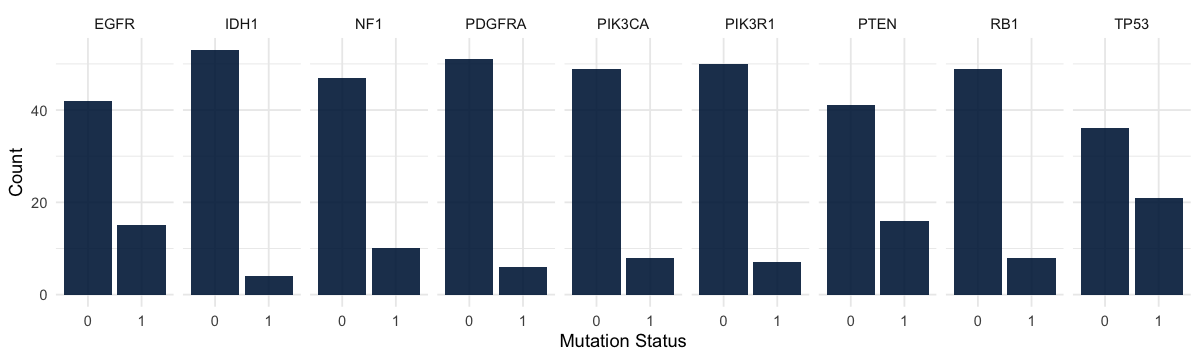

In [2]:
#Converts columns to factors
for (col in colnames(mut)){
mut[ , col] <- as.factor(mut[, col])
}

#tidy data matrix
mut.tidy <- mut %>% gather( Gene, Status, c(1:9)) 

#Histograms
options(repr.plot.width=10, repr.plot.height=3)
ggplot(data = mut.tidy, aes(Status)) + 
    facet_grid(. ~ Gene)+
    geom_histogram(stat="count", fill="#002147", alpha = 0.9) +
    xlab("Mutation Status")+
    ylab("Count")+
    theme_minimal()


We can see the wild-type group is over-represented compared to the mutated group.
<br>
<br>
<b>2.</b> We explore imaging features with box plots:

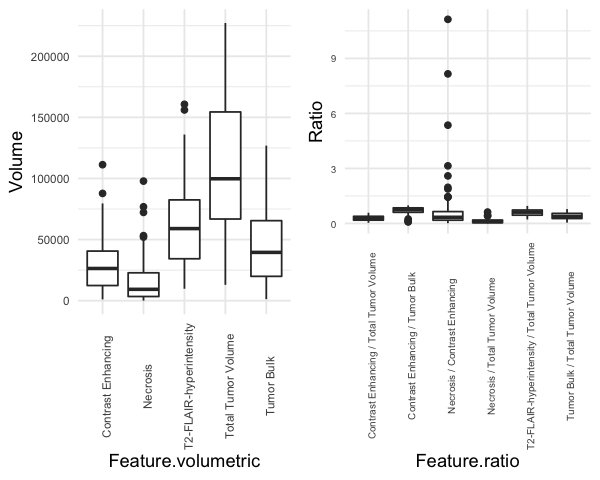

In [3]:
##Tidy data matrices
imv <- im[, c(1:5)]
imv.tidy <- imv %>% gather( Feature.volumetric, Volume, c(1:5))
imr <- im[, c(6:11)]
imr.tidy <- imr %>% gather( Feature.ratio, Ratio, c(1:6))

#Box plots
options(repr.plot.width=5, repr.plot.height=4)

v <- ggplot(imv.tidy, aes(x=Feature.volumetric, y=Volume))+
    geom_boxplot(show.legend=TRUE)+
    theme_minimal()+
    theme(axis.text.x = element_text(angle = 90))+
    theme(axis.text=element_text(size=7))

r <- ggplot(imr.tidy, aes(x=Feature.ratio, y=Ratio))+
    geom_boxplot(show.legend=TRUE)+
    theme_minimal()+
    theme(axis.text.x = element_text(angle = 90))+
    theme(axis.text=element_text(size=6))

ggarrange(v,r, ncol = 2, nrow=1)



Some of the features cover  wide range of values, and we see some outliers. This possibly points out to the high biological variability of tumor imaging features within patients.
<br>
<br>
## Replication of published analyses
### 1. Testing for normality

<p  style="text-align:justify"> Gutman et al. tested imaging features for normality using a Shapiro-Wilk test. In the Shapiro-Wilk test, the null hypothesis is that the population comes from a normal distribution. Therefore,if the p-value is less than 0.05 (chosen value), the null hypothesis is rejected and there is no evidence to claim that the data comes from a normal distribution.
<br>
    <br>
<b> 1.</b> We test our imaging features for normality: 
</p>


In [4]:
#Auxiliar matrix to store p_values of Shapiro-Wilk test
sw <- matrix(data = NA, nrow = 11, ncol = 1)
rownames(sw) <- colnames(im)
colnames(sw) <- "pval"

#Shapiro-Wilk test
for (f in rownames(sw)){
    sw[f,1] <- round(shapiro.test(im[ , f])$p.value, digits = 3)    
}

sw

,pval
Contrast Enhancing,0.000
Necrosis,0.000
T2-FLAIR-hyperintensity,0.001
Tumor Bulk,0.000
Total Tumor Volume,0.033
Necrosis / Contrast Enhancing,0.000
Contrast Enhancing / Tumor Bulk,0.000
Contrast Enhancing / Total Tumor Volume,0.025
Necrosis / Total Tumor Volume,0.000
T2-FLAIR-hyperintensity / Total Tumor Volume,0.026


<p  style="text-align:justify, margin:3px"> As we can see, all the p-values are lower than 0.05, therefore, there was no evidence suggesting that the imaging features were derived from a normally distributed population.
<br>
<br>
    <b>2.</b> Applying a Box-Cox transformation to obtain normalized imaging features. A Box-Cox transformation can be used to transform non-normal variables into a normal distribution. A parameter called $\lambda$ is key in the transformation. The optimal $\lambda$ value is one that returns the best approximation of a normal distribution curve. 
<br>
    We apply the Box-Cox transformation with values of lambda from -6 to 6, and a step of 0.1, and choose the optimal value of $\lambda$ idividually for each imaging feature.
</p>

In [5]:
#Box-Cox transformation
for (f in colnames(im)){
Box <- boxcox(im[ , f] ~ 1,              
             lambda = seq(-6,6,0.1), plotit=FALSE         # Try values -6 to 6 by 0.1
             )

Cox <- data.frame(Box$x, Box$y)            # Create a data frame with the results
Cox2 <- Cox[with(Cox, order(-Cox$Box.y)),] # Order the new data frame by decreasing y
                            
l <- Cox2[1, "Box.x"]
##Transforms the data --> If lambda = 0, the transform is a log
if (l != 0) {
    im[ , f] <-   (im[ , f] ^ l - 1)/l                                    
    }
    else{
    im[ , f]<- log(im[ , f])
    }
}

<p  style="text-align:justify"> 
<b> 3.</b> We test our imaging features for normality with the Shapiro-Wilk test: 
</p>

In [6]:
#Auxiliar matrix to store p_values of Shapiro-Wilk test
sw <- matrix(data = NA, nrow = 11, ncol = 1)
rownames(sw) <- colnames(im)
colnames(sw) <- "pval"

#Shapiro-Wilk test
for (f in rownames(sw)){
    sw[f,1] <- round(shapiro.test(im[ , f])$p.value, digits = 3)    
}

sw

,pval
Contrast Enhancing,0.813
Necrosis,0.832
T2-FLAIR-hyperintensity,0.204
Tumor Bulk,0.348
Total Tumor Volume,0.101
Necrosis / Contrast Enhancing,0.481
Contrast Enhancing / Tumor Bulk,0.032
Contrast Enhancing / Total Tumor Volume,0.124
Necrosis / Total Tumor Volume,0.794
T2-FLAIR-hyperintensity / Total Tumor Volume,0.024


<p  style="text-align:justify, margin:3px">Now we can see that only 3 features (Contrast Enhancing / Tumor Bulk, T2-FLAIR-hyperintensity / Total Tumor Volume, Tumor Bulk / Total Tumor Volume) have a p-value lower than 0.05; however, we decide to continue with all the transformed features.
</p>

<br>

### 2. Pearson correlations

<p  style="text-align:justify"> 
We compute and plot the Pearson correlation matrix:
</p>

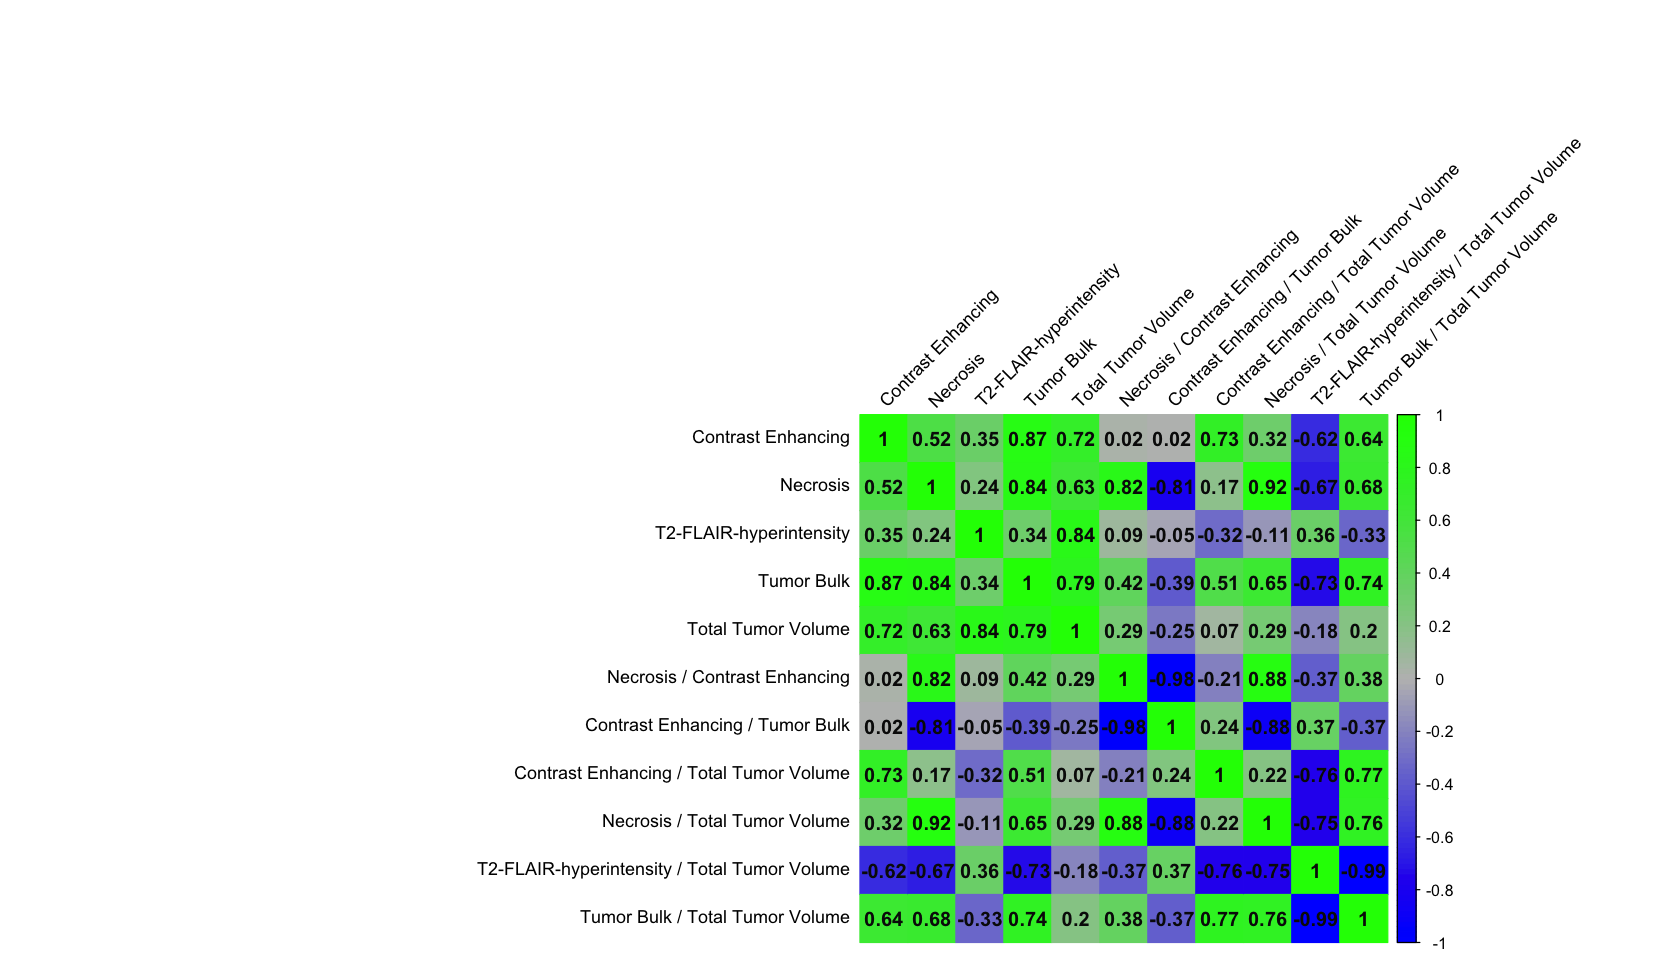

In [7]:
#Computes Pearson correlation matrix
corr_matrix <- cor( im, method = "pearson")
#Plots correlations
options(repr.plot.width=14, repr.plot.height=8)
color <- colorRampPalette(c("blue", "gray", "green"))
corrplot(corr_matrix, method="color", 
         tl.col = "black", tl.srt = 45, col = color(100), tl.cex=0.9, addCoef.col = "gray4")



<a href="url"><img src="img/img_glioblastoma_1/gutman_corr.jpg" width ="550px"></a>

<b>Figure 2. </b> Pearson correlation coefficient matrix published by Gutman et al. [2]



<p  style="text-align:justify">Overall, the correlation coefficient matrix showed the same trends as those seen in the plot provided by Gutman et al. (Figure 2). In general, there are high correlation and anti-correlation values between the features confirming that only 3 of the imaging features are independent: Contrast Enhancing, Necrosis, T2-FLAIR hyperintensity volumes; the remaining 8 features are derived from these 3.
    </p>


### 3. Two-sample Student's t-tests
For each of the 11 imaging features, the mean values for patients with mutated genes were compared to those of the wild-type cohort using two-sample Student’s t-tests.
<br>
<br>
We first join imaging and mutation data and then apply the t-tests:

In [8]:
#Join imaging and mutation data
#Create auxiliar matrix
matrix <- matrix(data = NA, nrow = 57, ncol = ncol(im) + ncol(mut))
matrix <- as.data.frame(matrix)
#Assign row and column names
rownames(matrix) <- rownames(mut)
colnames(matrix) <- c(colnames(im), colnames(mut))
#Fill table
matrix[, colnames(im)] <- im[rownames(matrix), ]
matrix[, colnames(mut)] <- mut[rownames(matrix),]
head(matrix)
print("Rows:", quote=FALSE)
nrow(matrix)



,Contrast Enhancing,Necrosis,T2-FLAIR-hyperintensity,Tumor Bulk,Total Tumor Volume,Necrosis / Contrast Enhancing,Contrast Enhancing / Tumor Bulk,Contrast Enhancing / Total Tumor Volume,Necrosis / Total Tumor Volume,T2-FLAIR-hyperintensity / Total Tumor Volume,Tumor Bulk / Total Tumor Volume,TP53,RB1,NF1,PIK3CA,PTEN,EGFR,PDGFRA,IDH1,PIK3R1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
TCGA-02-0033,73.29121,44.41228,208.7719,406.2891,4745.373,-1.576768,-0.15797389,-0.8225563,-1.855180,-0.3971988,-0.6918289,1,1,1,1,0,0,0,0,0
TCGA-02-0047,82.49561,52.33784,299.7218,497.2715,7918.368,-1.442979,-0.17453916,-0.9837354,-1.949322,-0.2838303,-0.8433511,0,0,0,1,0,0,1,0,0
TCGA-06-0119,89.12337,57.29702,229.6931,565.1719,6373.345,-1.406483,-0.17924209,-0.7121767,-1.679119,-0.5068028,-0.5594154,0,0,1,0,0,0,0,0,0
TCGA-06-0122,59.62203,20.81805,184.1241,271.3276,3405.435,-3.193614,-0.03871016,-0.9094899,-2.471422,-0.2838729,-0.8432907,0,0,0,0,0,0,0,0,0
TCGA-06-0130,48.08691,29.97475,153.8923,210.4806,2469.735,-1.447439,-0.17397709,-1.0014988,-1.969267,-0.2711966,-0.8614091,1,1,0,0,0,0,0,0,0
TCGA-06-0137,82.15590,44.52835,274.5790,475.2546,6980.691,-1.933584,-0.11913469,-0.9118509,-2.077444,-0.3110174,-0.8053752,0,0,0,0,0,0,0,0,0


[1] Rows:


[1] 57

In [9]:
#Transform matrix data to type data.table
matrix_data <- as.data.table(matrix)

##Creates matrix to store p-values. Rows --> # of features. Columns --> # of genes
m <- matrix(data=NA, nrow=ncol(im), ncol=ncol(mut))
rownames(m) <- colnames(im)
colnames(m) <- colnames(mut)

###Applies t-test to each subset of cases, for each gene
for (gene in colnames(mut)){
for (feature in colnames(im)){

tryCatch({
    #Selects cases which have gene == 1 / 0 (mutation/no mutation), and column == feature

    r <- t.test(matrix_data[get(gene)==1,feature, with=FALSE ], matrix_data[get(gene)==0, feature, with=FALSE])
    m[feature, gene] <- r$p.value

}, error = function(e) {
    cat("ERROR :",conditionMessage(e), "\n")
    return 
            }
)
}}
print("P-values of t-tests:", quote=FALSE)
head(m)




[1] P-values of t-tests:


,TP53,RB1,NF1,PIK3CA,PTEN,EGFR,PDGFRA,IDH1,PIK3R1
Contrast Enhancing,0.1050831,0.10905214,0.001651443,0.3256336,0.2791364,0.6396973,0.278803891,0.15161371,0.6662379
Necrosis,0.8407948,0.12897694,0.106831588,0.9777668,0.7297366,0.5317652,0.175122778,0.15145905,0.3751796
T2-FLAIR-hyperintensity,0.3596188,0.59916718,0.180816434,0.3176486,0.5490026,0.9063969,0.007527983,0.34460762,0.9341440
Tumor Bulk,0.4206461,0.08825234,0.009243977,0.5821462,0.6061339,0.7165393,0.309464070,0.32753017,0.3277389
Total Tumor Volume,0.8843518,0.07488060,0.044945481,0.6373296,0.9994273,0.9099068,0.022662608,0.89525031,0.5286279
Necrosis / Contrast Enhancing,0.8015893,0.21812542,0.619380020,0.7759295,0.1725911,0.4643148,0.064244688,0.07629109,0.4048091


We plot a heatmap of p-values for better visualization:

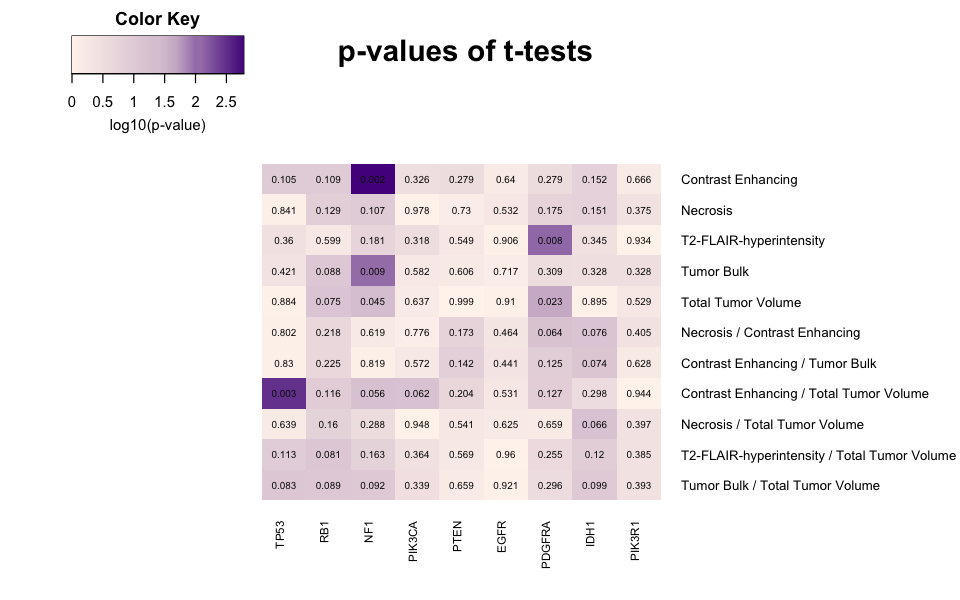

In [10]:
#Heatmap of p-values
matrix <- m
##-log10() transformation of p-values
matrix[, colSums(is.na(matrix)) == 0] <- (-log10(matrix[, colSums(is.na(matrix)) == 0]))


##Draw heatmap with all genes and all features
##Removes Columns with NAN values
matrix_nn <- matrix[ , colSums(is.na(matrix)) == 0]

##Color palette
my_palette <- colorRampPalette(c("seashell", "thistle3", "purple4"))(n = 479)

##Color breaks
col_breaks = c(seq(0,1.3,length=160), 
  seq(1.4,2,length=160),           
  seq(2.1,max(matrix_nn),length=160))     

options(repr.plot.width=8, repr.plot.height=5)
heatmap.2(as.matrix(matrix_nn), cellnote=round(as.matrix(m),digits=3), notecol="gray4", notecex=0.6, Rowv=NA, Colv=NA,density.info="none", trace="none", tracecol="black", margins =c(5,15),
  col=my_palette, breaks=col_breaks, cexRow=0.8, cexCol=0.7, key.xlab="log10(p-value)", main= " p-values of t-tests",cex.main=0.01)




<a href="url"><img src="img/img_glioblastoma_1/gutman_pvals.jpg" width="650px" ></a>
<b>Figure 3.</b>P-values of two-sample Student’s t-test done by Gutman et al. [2] 
<br>
<br>

<p  style="text-align:justify; margin:3px; line-height: 2">There was a lack of correlation observed between results obtained and results provided by Gutman et al. (Figure 3). The differences observed can be due to two factors. 
<br><b>(1)</b> The samples analysed were not the same. Gutman et al. [2] analysed 76 cases, whereas normality was tested for 102 cases in the replication, and t-tests were done with 57 cases. It was not possible to know the cases they used, since they did not provide a detailed list of cases. 
<br><b>(2)</b> The actual value of the features. TCIA maintains a storage of the images, but does not provide imaging features. They extracted the imaging features from the images. In the replication, imaging features used were those provided in [3]. These two factors could possibly explain the differences when testing for normality and applying t-tests. However, results might also reflect the low repeatability of the t-test when applied to this type of data.</p>

### Conclusions

<p  style="text-align:justify; line-height: 2">
• Imaging features were not normal, as reported by Gutman et al. [2]. Reason why we applied a Box-Cox transformation<br><br>
• It was surprising to see that even though features extracted by Gutman et al. and features used in the replication showed different behaviours in terms of the underlying statistical distribution, the correlation coefficient matrices had similar trends, both with high correlation values overall [1]. <br> <br>
• The third step was to apply two-sample t-tests for the 11 imaging features and 9 genes considered in the study by Gutman et al. [2]. This is a very statistically simple way of testing differences between groups, however, it can be useful as a first approximation to study differences between groups that reflect differences in the mutation status. Results from the replication did not correlate with previously published results [1]. <br> <br>
</p>


# References
[1] Gonzalez Pigorini G. Association of radiological and genomic features for cancer stratification [MRes Biomedical Research (Data Science)]. Imperial College London; 2018. 
<br>
<br>
[2] David A. Gutman, William D. Dunn, Patrick Grossmann, Lee A.D. Cooper, Chad A. Holder, Keith L. Ligon, Brian M. Alexander, and Hugo J.W.L. Aerts. Somatic mutations associated with MRI-derived volumetric features in glioblastoma. Neuroradiology, 7(12):1227–1237, 2015. 
<br>
<br>
[3]Spyridon Bakas, Hamed Akbari, Aristeidis Sotiras, Michel Bilello, Martin Rozycki, Justin S. Kirby, John B. Freymann, Keyvan Farahani, and Christos Davatzikos. Advancing The Cancer Genome Atlas glioma MRI collections with expert segmentation labels and radiomic features. Scientific Data, 4(September):170117, 2017. URL http://www.nature.com/articles/sdata2017117.
<br>
<br>
[4] GDC [Internet]. Portal.gdc.cancer.gov. 2018 [cited 2 April 2018]. Available from: https://portal.gdc.cancer.gov/exploration?filters=%7B%22op%22%3A%22AND%22%2C%22content%22%3A%5B%7B%22op%22%3A%22IN%22%2C%22content%22%3A%7B%22field%22%3A%22cases.case_id%22%2C%22value%22%3A%5B%22set_id%3AAWJSvsz3Wcjtn2KP3xMl%22%5D%7D%7D%5D%7D&searchTableTab=genes
